In [1]:
from helpers import *
import shap

In [2]:
goi_id = getGOI()

goi_pat_log, X_log, y_log, X_log_train, X_log_test, y_log_train, y_log_test = getProcessedData(goi_id)

X_corr, X_train_corr, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

In [3]:
xgb_t20_corr_file = open("../models/XGB_TOP20_CORR_PARAMS", 'rb')
xgb_t20_corr = pickle.load(xgb_t20_corr_file)
xgb_t20_corr_file.close()

In [24]:
X_train_corr

GENE_NAMES,ATF1,XBP1,GCFC2,IRF2,NFYB,CREB1,RBPJ,TCF12,TP53,STAT1,TAF1,ATF2,EED,SP1,HNRNPLL,IKZF1,BCL11A,POU2F1,ARNT,NBN
MMRF_2829_1_BM,9.702173,14.817633,10.865733,9.392317,11.716819,11.660887,13.035486,12.409126,9.848623,15.090361,12.031701,11.856815,11.698271,13.211584,10.946906,12.564626,10.409391,12.459432,12.063395,12.927593
MMRF_1766_1_BM,10.741467,17.790145,9.121534,13.134747,11.141469,11.839597,12.924070,12.980140,12.261213,14.103206,12.613099,11.842743,10.393390,13.046783,10.704768,13.255766,10.654636,11.693051,11.072803,12.306916
MMRF_2098_1_BM,9.445015,16.911825,8.499846,10.841564,9.385862,10.124121,11.131214,11.902752,10.373953,13.411908,10.700440,10.389094,9.505812,10.988685,9.607330,11.764042,9.131857,10.559377,9.592457,10.696968
MMRF_2168_1_BM,9.868823,16.110667,9.149747,11.454813,10.156083,11.164278,11.997532,11.922213,11.261507,13.492354,10.863412,11.260332,10.368506,11.745254,10.505812,12.299208,10.689998,11.736402,10.210671,10.435670
MMRF_2314_1_BM,11.144658,16.706955,10.586840,12.254733,11.586840,11.930737,12.766943,12.679480,12.581201,14.766995,12.112440,11.479780,10.408330,12.549303,11.381543,13.225207,10.209453,11.734286,10.640245,12.465566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_1450_1_BM,10.048487,17.363793,10.032046,11.597587,10.193525,11.006326,11.541097,11.988330,8.082149,12.918491,11.287135,11.038919,10.040290,11.863799,10.435670,12.519391,10.007027,11.390169,10.871905,10.903882
MMRF_1491_1_BM,9.164907,17.065132,10.390169,11.399812,9.712527,10.588715,12.013323,12.498849,9.199672,15.004220,11.456868,10.173677,10.238405,11.257388,10.071462,13.199059,7.507795,11.588246,11.405141,11.659104
MMRF_2267_1_BM,9.717676,17.142805,9.807355,11.459432,10.407268,10.740624,11.662668,12.509528,10.734710,14.171568,11.354249,11.341519,9.243174,11.667555,10.134426,12.294908,9.501837,11.014718,10.622052,11.771489
MMRF_2253_1_BM,9.998590,17.921556,9.800900,11.205182,10.451211,10.965784,11.800091,11.897089,10.241983,14.017678,10.787086,10.843921,9.497852,12.148794,9.807355,12.186424,9.481799,11.009829,11.594791,11.728346


In [25]:
X_test_corr

GENE_NAMES,ATF1,XBP1,GCFC2,IRF2,NFYB,CREB1,RBPJ,TCF12,TP53,STAT1,TAF1,ATF2,EED,SP1,HNRNPLL,IKZF1,BCL11A,POU2F1,ARNT,NBN
MMRF_1744_1_BM,10.425216,17.135529,9.467606,11.708653,10.652845,10.782179,11.820578,11.725792,10.292322,14.158925,11.960726,11.507795,9.739781,11.549303,10.370687,12.690871,9.868823,10.621136,10.741467,11.789126
MMRF_2437_1_BM,10.124121,16.394144,9.455327,11.348728,10.148477,10.825754,11.590587,11.798877,9.939579,14.448891,11.143383,11.618386,9.818582,11.981567,10.604553,12.067434,9.890264,10.501837,9.865733,11.202736
MMRF_1713_1_BM,10.092757,17.197927,9.601771,12.282509,10.372865,11.224002,11.845882,12.756765,10.816984,13.931661,11.175550,11.086136,9.871905,11.545930,10.911392,13.111788,10.915132,11.068778,10.586840,11.863799
MMRF_2813_1_BM,9.214319,14.816184,9.688250,10.363040,10.652845,11.887601,11.911392,12.756139,10.581201,13.053247,12.259449,10.992938,8.625709,10.542065,10.941781,13.440610,10.592457,12.439831,9.964341,11.446049
MMRF_2822_1_BM,8.748193,13.732697,7.876517,8.717676,10.055282,11.532843,12.373137,11.735556,9.204571,11.288866,10.854089,10.458407,9.287712,11.470150,10.199672,12.675516,8.842350,12.179287,9.642052,11.223398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_1648_1_BM,10.064743,16.648975,9.675957,12.051889,10.728771,11.629812,11.603163,13.388690,10.972980,16.193487,11.678600,11.622052,10.484823,12.116344,11.310045,12.590353,9.824959,11.284824,11.284246,11.733015
MMRF_2107_1_BM,9.541097,17.298877,9.751544,11.465566,10.204571,11.401946,11.437232,13.030840,11.791977,13.082315,11.597121,11.341519,10.133142,11.576957,10.154818,12.171177,8.366322,11.171177,10.784635,11.383704
MMRF_1403_1_BM,9.670656,16.837948,8.921841,11.054604,9.964341,10.355351,11.765286,11.523072,9.505812,12.963077,11.246147,10.728771,8.771489,11.433585,10.072803,12.409391,2.000000,11.105909,11.818183,11.432542
MMRF_1455_1_BM,9.202124,15.687485,8.434628,10.286558,9.691744,11.290019,11.798067,11.645208,9.659996,12.539159,11.613789,11.844313,9.654636,12.523317,10.441907,12.619761,6.087463,11.783817,11.739359,10.964341


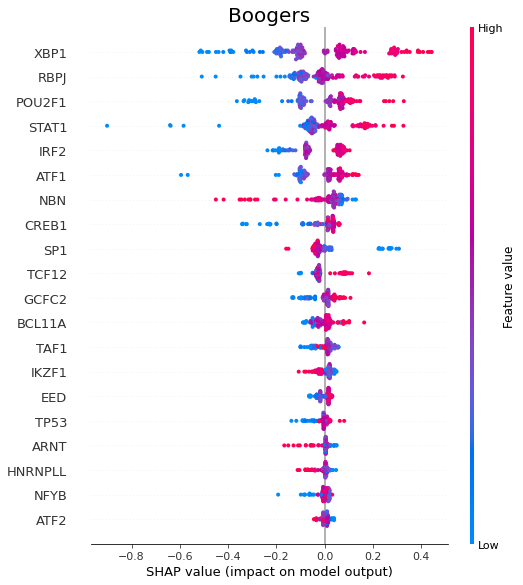

In [27]:
# !# Create object that can calculate shap values
explainer = shap.Explainer(xgb_t20_corr)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer(X_test_corr)

shap.plots.beeswarm(shap_values, max_display = 20, show = False)
plt.title('SHAP values ', size = 20)
plt.savefig('test')

In [8]:
help(shap.plots.beeswarm)

Help on function beeswarm in module shap.plots._beeswarm:

beeswarm(shap_values, max_display=10, order=shap.Explanation.abs.mean(0), clustering=None, cluster_threshold=0.5, color=None, axis_color='#333333', alpha=1, show=True, log_scale=False, color_bar=True, plot_size='auto', color_bar_label='Feature value')
    Create a SHAP beeswarm plot, colored by feature values when they are provided.
    
    Parameters
    ----------
    shap_values : Explanation
        This is an Explanation object containing a matrix of SHAP values (# samples x # features).
    
    max_display : int
        How many top features to include in the plot (default is 20, or 7 for interaction plots)
    
    plot_size : "auto" (default), float, (float, float), or None
        What size to make the plot. By default the size is auto-scaled based on the number of
        features that are being displayed. Passing a single float will cause each row to be that 
        many inches high. Passing a pair of floats will 

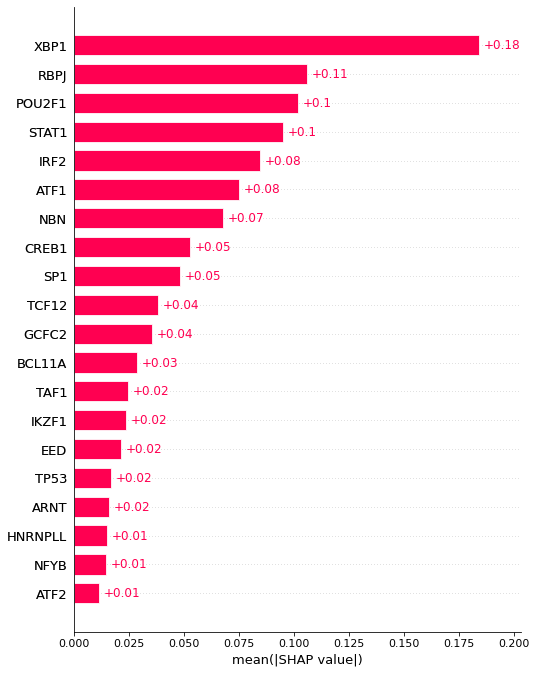

In [7]:
shap.plots.bar(shap_values, max_display = 20)

In [39]:
import os

os.listdir('../models/')
os.fsdecode(os.listdir('../models/')[0])
file = open(os.path.join('../models/', os.fsdecode(os.listdir('../models/')[0])), 'rb')
xgb = pickle.load(file)
file.close()

# directory = os.fsencode('../models/')
    
    
    
# for file in os.listdir('../models/'):
#     filename = os.fsdecode(file)
#     print(os.path.join('../models/', filename))
    
# #      if filename.endswith(".asm") or filename.endswith(".py"): 
# #          # print(os.path.join(directory, filename))
# #          continue
#      else:
#          continue

In [40]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5658140364286011,
             colsample_bynode=0.8078536842438382,
             colsample_bytree=0.7051418651679482, gamma=0.7909390660598336,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0968001207373439, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=183, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8963379482245502, tree_method='exact',
             validate_parameters=1, verbosity=None)